In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/VINAY/Desktop/car.csv")

In [5]:
df.shape

(99, 13)

In [9]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [10]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [52]:
    df.pivot_table(index=["Education","House Loan","Personal loan"],columns=["Marrital Status"],values=["Age"]
                  ,aggfunc = lambda x:len(x))
                   

Age       
Marrital Status                        Married Single
Education     House Loan Personal loan               
Graduate      No         No               18.0    3.0
                         Yes               2.0    3.0
              Yes        No                7.0    NaN
                         Yes              10.0    NaN
Post Graduate No         No               26.0    7.0
                         Yes               1.0    2.0
              Yes        No                6.0    NaN
                         Yes              14.0    NaN

In [59]:
df.pivot_table(index=["Make"],columns=["Education"],values=["Age"],aggfunc= lambda x:
               len(x))

Age              
Education Graduate Post Graduate
Make                            
Baleno          10             9
Ciaz             8             4
City             3             7
Creata           5             9
Duster           3             4
Luxuray          1             1
SUV              7            12
Verna            1             3
i20              5             7

In [75]:
df.pivot_table(index=["Make","House Loan"],columns=["Marrital Status"],
               values=["Age","Total Salary(Lakhs)"],aggfunc= {"Age":lambda x:
               len(x), "Total Salary(Lakhs)":np.mean})

Age        Total Salary(Lakhs)           
Marrital Status    Married Single             Married     Single
Make    House Loan                                              
Baleno  No             6.0    5.0           13.500000   9.600000
        Yes            8.0    NaN           15.625000        NaN
Ciaz    No             5.0    1.0           16.800000  12.000000
        Yes            6.0    NaN           21.666667        NaN
City    No             6.0    2.0           19.500000  11.500000
        Yes            2.0    NaN           26.500000        NaN
Creata  No             7.0    1.0           31.285714  15.000000
        Yes            6.0    NaN           35.666667        NaN
Duster  No             4.0    NaN           22.750000        NaN
        Yes            3.0    NaN           24.333333        NaN
Luxuray No             2.0    NaN           46.000000        NaN
SUV     No            12.0    3.0           32.083333  19.333333
        Yes            4.0    NaN           38.750000        NaN
Verna   No             3.0    NaN           18.000000        NaN
        Yes            1.0    NaN           26.000000        NaN
i20     No             2.0    3.0           15.000000  10.000000
        Yes            7.0    NaN           19.000000        NaN

In [80]:
df.loc[df['Price(Lakhs)'].max()]

Age                          41
Profession             Business
Marrital Status         Married
Education              Graduate
No of Dependents              3
Personal loan                No
House Loan                   No
Wife Working                 No
Salary                       11
Wife Salary(Lakhs)            0
Total Salary(Lakhs)          11
Make                     Baleno
Price(Lakhs)                  7
Name: 30, dtype: object

In [1]:
df["Total Salary(Lakhs)"].mean()

NameError: name 'df' is not defined

In [25]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [26]:
df[df.Price==df.Price.max()]

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
15,49,Salaried,Married,Post Graduate,4,No,No,Yes,2500000,2000000,4500000,Luxuray,3000000
54,41,Salaried,Married,Graduate,2,No,No,Yes,2900000,1800000,4700000,Luxuray,3000000


In [36]:
g=df.groupby("Make")

In [37]:
g.mean()


,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
Make,,,,,,
Baleno,33.421053,2.210526,1.263158e+06,7.368421e+04,1.336842e+06,7.052632e+05
Ciaz,37.916667,2.083333,1.658333e+06,2.250000e+05,1.883333e+06,1.091667e+06
City,34.000000,1.800000,1.510000e+06,4.200000e+05,1.930000e+06,1.200000e+06
Creata,38.714286,2.285714,2.228571e+06,9.714286e+05,3.200000e+06,1.500000e+06
Duster,40.571429,2.857143,1.771429e+06,5.714286e+05,2.342857e+06,1.314286e+06
Luxuray,45.000000,3.000000,2.700000e+06,1.900000e+06,4.600000e+06,3.000000e+06
SUV,37.421053,2.000000,2.152632e+06,9.947368e+05,3.147368e+06,1.594737e+06
Verna,34.000000,2.500000,1.575000e+06,4.250000e+05,2.000000e+06,9.025000e+05
i20,33.500000,2.083333,1.391667e+06,2.166667e+05,1.608333e+06,8.000000e+05


In [38]:
g.max()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
Make,,,,,,,,,,,,
Baleno,46,Salaried,Single,Post Graduate,4,Yes,Yes,m,2100000,500000,2100000,800000
Ciaz,51,Salaried,Single,Post Graduate,4,Yes,Yes,Yes,2600000,800000,2600000,1100000
City,41,Salaried,Single,Post Graduate,4,No,Yes,Yes,2800000,800000,2800000,1200000
Creata,51,Salaried,Single,Post Graduate,4,Yes,Yes,Yes,3100000,1800000,4100000,1500000
Duster,49,Salaried,Married,Post Graduate,4,Yes,Yes,Yes,2900000,1300000,2900000,1500000
Luxuray,49,Salaried,Married,Post Graduate,4,No,No,Yes,2900000,2000000,4700000,3000000
SUV,50,Salaried,Single,Post Graduate,4,Yes,Yes,Yes,3800000,2100000,5200000,1600000
Verna,37,Salaried,Married,Post Graduate,4,Yes,Yes,Yes,2000000,900000,2600000,1200000
i20,42,Salaried,Single,Post Graduate,3,Yes,Yes,Yes,2700000,800000,2700000,800000


In [35]:
df.isnull().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
Length: 99, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
Age                 99 non-null int64
Profession          99 non-null object
Marrital Status     99 non-null object
Education           99 non-null object
No of Dependents    99 non-null int64
Personal loan       99 non-null object
House Loan          99 non-null object
Wife Working        99 non-null object
Salary              99 non-null int64
Wife Salary         99 non-null int64
Total Salary        99 non-null int64
Make                99 non-null object
Price               99 non-null int64
dtypes: int64(6), object(7)
memory usage: 7.4+ KB


In [66]:
df.Profession = df.Profession.astype(str)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
Age                 99 non-null int64
Profession          99 non-null object
Marrital Status     99 non-null object
Education           99 non-null object
No of Dependents    99 non-null int64
Personal loan       99 non-null object
House Loan          99 non-null object
Wife Working        99 non-null object
Salary              99 non-null int64
Wife Salary         99 non-null int64
Total Salary        99 non-null int64
Make                99 non-null object
Price               99 non-null int64
dtypes: int64(6), object(7)
memory usage: 7.4+ KB


In [67]:
df.Price=df.Price.astype(float).div(100000).round(2)


In [68]:
df.rename(columns={"Price":"Price(Lakhs)"},inplace=True)

In [47]:
df


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price(Lakhs)
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,8.0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,10.0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,12.0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,12.0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,16.0
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,7.0
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,12.0
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,7.0
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,11.0
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,8.0


In [69]:
df.Salary=df.Salary.astype(float).div(100000).round(2)
df["Wife Salary"]=df["Wife Salary"].astype(float).div(100000).round(2)
df["Total Salary"]=df["Total Salary"].astype(float).div(100000).round(2)
df.rename(columns={"Price":"Price(Lakhs)","Total Salary":"Total Salary(Lakhs)",
                   "Wife Salary":"Wife Salary(Lakhs)"},inplace=True)

In [50]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary(Lakhs),Total Salary(Lakhs),Make,Price(Lakhs)
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,8.0,0.0,8.0,i20,8.0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,14.0,6.0,20.0,Ciaz,10.0
2,45,Business,Married,Graduate,4,Yes,Yes,No,18.0,0.0,18.0,Duster,12.0
3,41,Business,Married,Post Graduate,3,No,No,Yes,16.0,6.0,22.0,City,12.0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,18.0,8.0,26.0,SUV,16.0
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,9.0,0.0,9.0,Baleno,7.0
6,31,Salaried,Married,Graduate,4,No,No,Yes,12.0,6.0,18.0,City,12.0
7,33,Business,Married,Post Graduate,4,No,No,No,14.0,0.0,14.0,Baleno,7.0
8,34,Business,Married,Post Graduate,4,No,No,No,20.0,0.0,20.0,Verna,11.0
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,12.0,7.0,19.0,i20,8.0


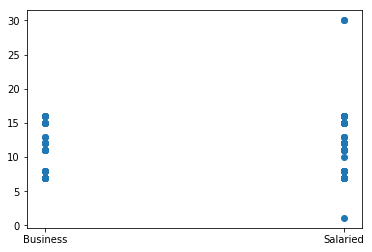

In [83]:
plt.scatter(df["Profession"],df["Price(Lakhs)"])

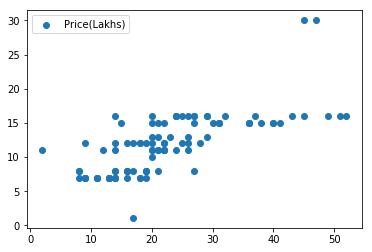

In [88]:
plt.scatter(df["Total Salary(Lakhs)"],df["Price(Lakhs)"]
           )
plt.legend()

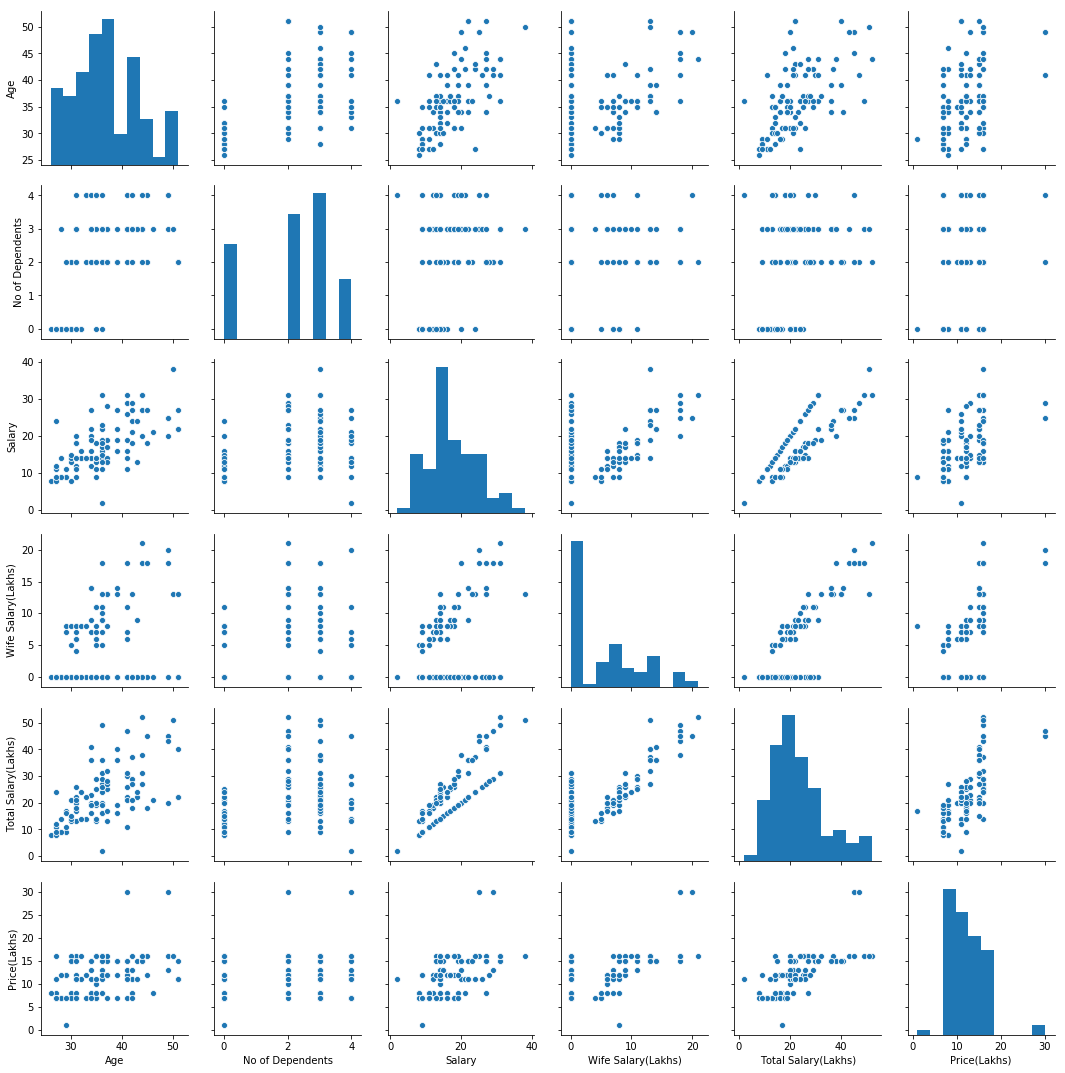

In [90]:
sns.pairplot(df)

In [92]:
df.corr()

,Age,No of Dependents,Salary,Wife Salary(Lakhs),Total Salary(Lakhs),Price(Lakhs)
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661
No of Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630
Wife Salary(Lakhs),0.288546,0.102010,0.347934,1.000000,0.799238,0.635858
Total Salary(Lakhs),0.587082,0.234379,0.841545,0.799238,1.000000,0.717442
Price(Lakhs),0.376661,0.088822,0.547630,0.635858,0.717442,1.000000


In [97]:
sd=sns.load_dataset("C:/Users/VINAY/Desktop/car.csv")

HTTPError: HTTP Error 404: Not Found

In [101]:
len(df[df["Make"]=="Ciaz"])

12